<a href="https://colab.research.google.com/github/Labani4321/Data-Science/blob/main/CustomerExpensePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import all basic modules**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Import the Dataset**

In [33]:
df = pd.read_csv("/content/Ecommerce Customers.csv")
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [34]:
df.shape

(500, 8)

In [35]:
df.dtypes

,0
Email,object
Address,object
Avatar,object
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


In [36]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


## **EDA: Exploratory Data Analysis**

In [37]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


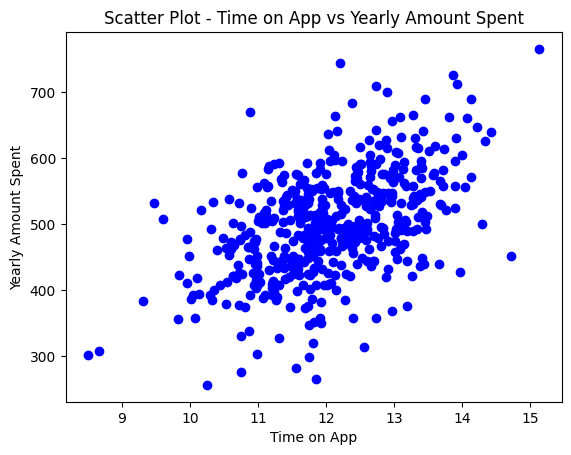

In [38]:
x = df['Time on App']
y = df['Yearly Amount Spent']

plt.scatter(x, y, color='blue', marker='o')

plt.title('Scatter Plot - Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

plt.show()

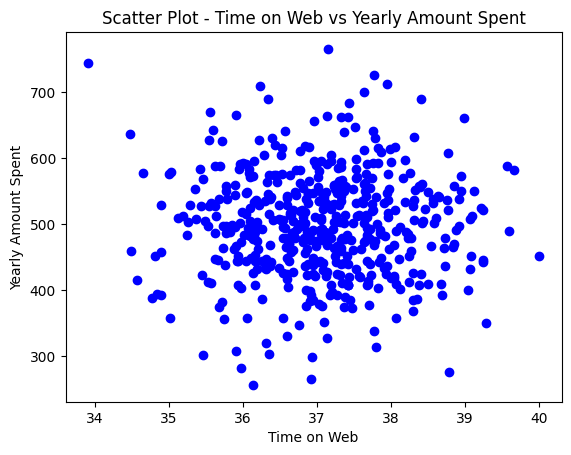

In [39]:
x = df['Time on Website']
y = df['Yearly Amount Spent']

plt.scatter(x, y, color='blue', marker='o')

plt.title('Scatter Plot - Time on Web vs Yearly Amount Spent')
plt.xlabel('Time on Web')
plt.ylabel('Yearly Amount Spent')

plt.show()

<Axes: >

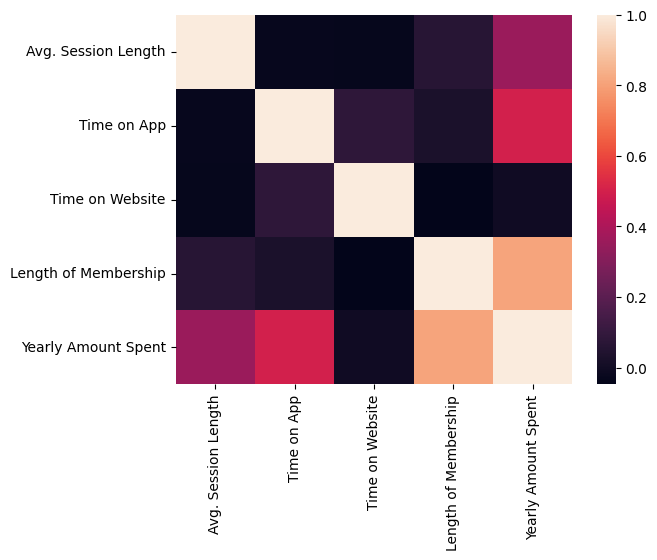

In [40]:
corr = df.select_dtypes('number').corr()

sns.heatmap(corr)

# Dropping non-significant columns

In [41]:
df.drop(['Email', 'Address', 'Avatar'],axis=1 ,inplace=True)
df.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


### **1. Train Test Split**

In [42]:
from sklearn.model_selection import train_test_split

y = df[['Yearly Amount Spent']]
X = df.drop(columns=['Yearly Amount Spent'])

In [43]:
X.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [44]:
y.head(5)

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


# **Model Building**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
X_test.shape

(100, 4)

In [47]:
X_train.shape

(400, 4)

### **2. Data Transformation**

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scl = StandardScaler()
scaled_X_train = scl.fit_transform(X_train)

scaled_X_test = scl.fit_transform(X_test)


In [50]:
pd.DataFrame(scaled_X_train)

,0,1,2,3
0,-1.822160,1.205863,-0.125495,-1.272752
1,-0.921078,-2.041998,0.081056,0.002643
2,0.765303,-0.892446,-0.785963,0.774123
3,-0.216300,-0.241272,-0.279913,-0.060903
4,0.333489,0.716997,-1.520914,-0.305554
...,...,...,...,...
395,0.080599,1.835929,2.084425,-0.629094
396,-0.680505,-1.409122,0.891667,-0.131719
397,2.723773,-1.192048,-1.506509,2.598134
398,0.121726,-0.452630,-1.110151,0.102238


### **3. Model Taining**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

y_pred = lr.predict(scaled_X_test)

print(f'mean absolute error is: {mean_absolute_error(y_test, y_pred)}')
print(f'mean squared error is: {mean_squared_error(y_test, y_pred)}')

mean absolute error is: 8.351745046577465
mean squared error is: 111.40033565793729


In [53]:
y_pred

array([[502.61904516],
       [524.55365484],
       [566.31905684],
       [483.17194357],
       [428.48583041],
       [512.70774263],
       [482.84384779],
       [464.02640922],
       [522.69681613],
       [444.50962147],
       [491.0012931 ],
       [529.80317263],
       [579.94092846],
       [556.83320821],
       [686.42896229],
       [478.1459723 ],
       [321.2057723 ],
       [463.01961986],
       [456.55676318],
       [466.09272718],
       [460.32531818],
       [339.73864461],
       [507.51271638],
       [406.93176417],
       [766.55260758],
       [430.72960942],
       [516.78942711],
       [481.03864614],
       [314.13758441],
       [592.34356812],
       [509.24407666],
       [396.18961432],
       [468.26467019],
       [321.331008  ],
       [469.51530783],
       [552.69442108],
       [622.46008346],
       [594.35692452],
       [499.70276427],
       [407.90736545],
       [510.23681729],
       [550.06203865],
       [428.43772107],
       [562

In [54]:
y_test

,Yearly Amount Spent
304,494.687156
340,501.122492
47,563.672873
67,469.310861
479,402.167122
...,...
11,522.337405
192,505.119638
92,515.828815
221,591.437736


In [55]:
r2_score(y_test, y_pred)*100

98.47599596210806